<a href="https://colab.research.google.com/github/Caged-Covid/Entrega_Final/blob/main/Analises-Caged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise dos dados CAGED

Curso: Banco de Dados.

Alunos: 

*   Leticia Macedo Prudente de Carvalho 
*   Roberta Cristina de Abreu 
*   Thais Bitencourt de meneses
*   Yan Rodrigues de Azevedo

Professor: Fernando Masanori

Importação do pandas para uso na analise e no os para controle dos diretórios. 

In [ ]:
import pandas as pd
import os

Construção dos dataframes carregados pelo drive. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = []
for file in os.listdir("/content/drive/MyDrive/CAGED_rep"):
    if file.endswith(".txt"):
      dados.append(pd.read_csv(os.path.join("/content/drive/MyDrive/CAGED_rep", file), sep=";", encoding='utf-8', usecols=[0, 4, 6, 9, 10, 12, 13, 16, 20]))

dados = pd.concat(dados, ignore_index=True)

Alteração dos dados de admitidos e desligados

In [ ]:
dados['saldomovimentação'] = dados['saldomovimentação'].replace(1,'admitido')
dados['saldomovimentação'] = dados['saldomovimentação'].replace(-1,'demitido')

Alteração dos dados de sexo

In [ ]:
dados['sexo'] = dados['sexo'].replace(1,'masculino')
dados['sexo'] = dados['sexo'].replace(3,'feminino')

Alteração dos dados de escolaridade

In [ ]:
def get_instrucao(value):
  value = str(value)
  instrucao = {'1':'Analfabeto',
               '2':'Até 5ª Incompleto',
               '3':'5ª Completo Fundamental',
               '4':'6ª a 9ª Fundamental',
               '5':'Fundamental Completo',
               '6':'Médio Incompleto',
               '7':'Médio Completo',
               '8':'Superior Incompleto',
               '9':'Superior Completo',
               '10':'Mestrado',
               '11':'Doutorado',
               '80':'Pós-Graduação completa',
               '99':'Não Identificado'
              }
  return instrucao[value]

In [ ]:
def get_categoria(value):
  value = str(value)
  categoria = {'A':'Agricultura, Pecuária, Produção Florestal, Pesca e Aquicultura',
  'B':'Indústrias Extrativas',
  'C':'Indústrias de Transformação',
  'D':'Eletricidade e Gás',
  'E':'Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação',
  'F':'Construção',
  'G':'Comércio, Reparação de Veículos Automotores e Motocicletas',
  'H':'Transporte, Armazenagem e Correio',
  'I':'Alojamento e Alimentação',
  'J':'Informação e Comunicação',
  'K':'Atividades Financeiras, de Seguros e Serviços Relacionados',
  'L':'Atividades Imobiliárias',
  'M':'Atividades Profissionais, Científicas e Técnicas',
  'N':'Atividades Administrativas e Serviços Complementares',
  'O':'Administração Pública, Defesa e Seguridade Social',
  'P':'Educação',
  'Q':'Saúde Humana e Serviços Sociais',
  'R':'Artes, Cultura, Esporte e Recreação',
  'S':'Outras Atividades de Serviços',
  'T':'Serviços Domésticos',
  'U':'Organismos Internacionais e Outras Instituições Extraterritoriais',
  'Z':'Não identificado'
  }
  return categoria[value]

In [ ]:
def get_racacor(value):
  value = str(value)
  racas = {'1':'Branca',
      '2':'Preta',
      '3':'Parda',
      '4':'Amarela',
      '5':'Indígena',
      '6':'Não informada',
      '9':'Não Identificado'
  }

In [ ]:
dados['graudeinstrução'] = dados.apply(lambda x:get_instrucao(x['graudeinstrução']), axis=1)

In [ ]:
dados['seção'] = dados.apply(lambda x:get_categoria(x['seção']), axis=1)

In [ ]:
dados['raçacor'] = dados.apply(lambda x:get_racacor(x['raçacor']), axis=1)

Realização das filtragens e grupos por sexo e admitidos/deligados

In [ ]:
dados_demitido = dados[(dados.saldomovimentação=='demitido')]['sexo'].value_counts()
dados_admitido = dados[(dados.saldomovimentação=='admitido')]['sexo'].value_counts()

1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por:

- Gênero

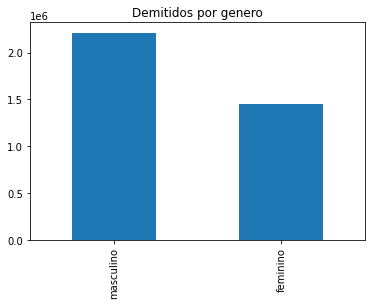

In [ ]:
dados_demitido.plot.bar(title='Demitidos por genero')

Mulheres

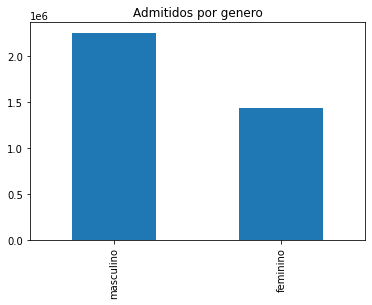

In [ ]:
dados_admitido.plot.bar(title='Admitidos por genero')

- Nível de escolaridade

In [ ]:
dados_grau_admitido = dados[(dados.saldomovimentação=='admitido')]['graudeinstrução'].value_counts() 
dados_grau_demitido = dados[(dados.saldomovimentação=='demitido')]['graudeinstrução'].value_counts() 

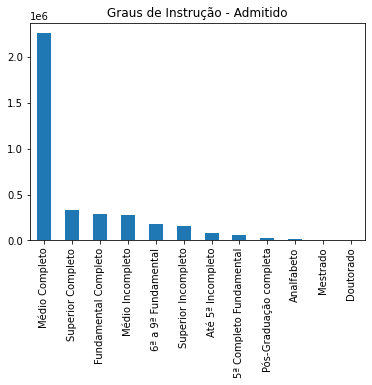

In [ ]:
dados_grau_admitido.plot.bar(title='Graus de Instrução - Admitido')

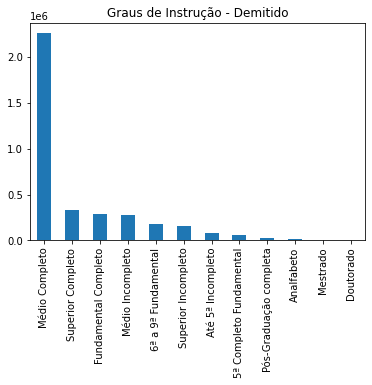

In [ ]:
dados_grau_admitido.plot.bar(title='Graus de Instrução - Demitido')

- Faixa etária

In [ ]:
dados_idade_admitido = dados[(dados.saldomovimentação=='admitido')]['idade'].value_counts() 
dados_idade_demitido = dados[(dados.saldomovimentação=='demitido')]['idade'].value_counts() 

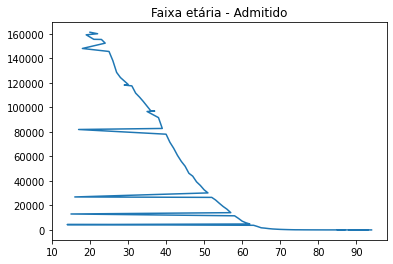

In [ ]:
dados_idade_admitido.plot.line(title='Faixa etária - Admitido')

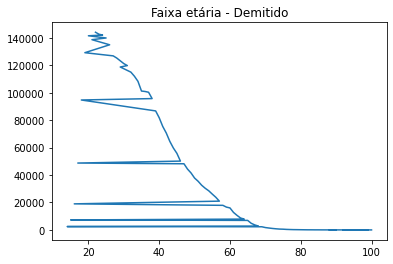

In [ ]:
dados_idade_demitido.plot.line(title='Faixa etária - Demitido')

- Setores (Agronegócio, Indústria, Comércio, etc...) 

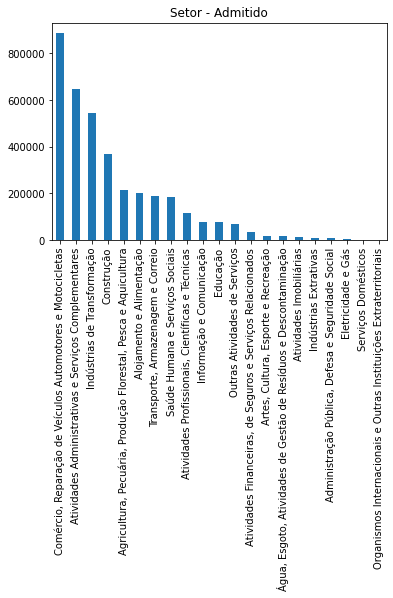

In [ ]:
dados_setores_admitido = dados[(dados.saldomovimentação=='admitido')]['seção'].value_counts() 
dados_setores_demitido = dados[(dados.saldomovimentação=='demitido')]['seção'].value_counts() 

dados_setores_admitido.plot.bar(title='Setor - Admitido')

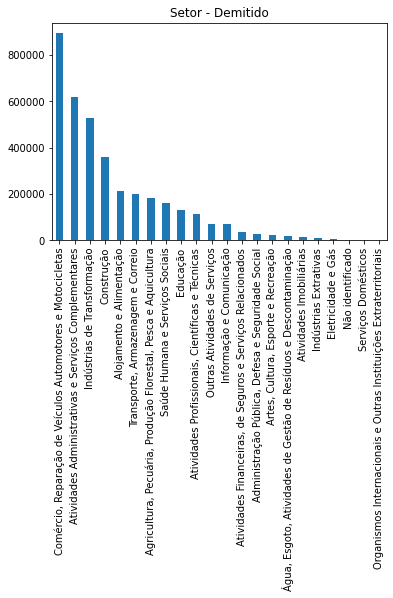

In [ ]:
dados_setores_demitido.plot.bar(title='Setor - Demitido')

2 – Quais foram as estatísticas de consumo/gastos após o aumento ou diminuição do: 

In [ ]:
dados_consumo_admitido = dados[(dados.saldomovimentação=='admitido')]['salário'].sum() 
dados_consumo_demitido = dados[(dados.saldomovimentação=='demitido')]['salário'].sum() 

In [ ]:
dados_consumo_admitido

12198690872.251858

In [ ]:
dados_consumo_demitido

20579475592.74851

3 - Quero saber a quantidade de admissões/demissões por gênero no período da pandemia.

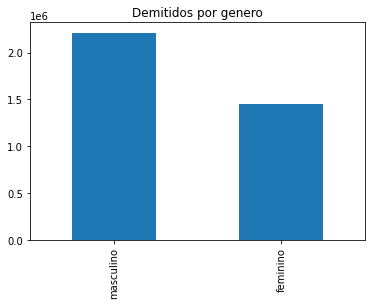

In [ ]:
dados_demitido.plot.bar(title='Demitidos por genero')

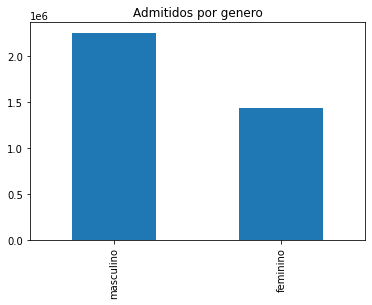

In [ ]:
dados_admitido.plot.bar(title='Admitidos por genero')

4 - Quero saber a quantidade de demissões por tipo, tipo movimentação / demissão.

- Diferença salarial entre homens e mulheres admitidos;

In [ ]:
dados_admitido_salarios_masculino = dados[(dados.saldomovimentação=='admitido') & (dados.sexo=='masculino')]['salário'].sum()
dados_admitido_salarios_feminino = dados[(dados.saldomovimentação=='admitido') & (dados.sexo=='feminino')]['salário'].sum()

In [ ]:
dados_admitido_salarios = pd.DataFrame({'sexo':['Masculino', 'Feminino'], 'salary':[int(dados_admitido_salarios_masculino), int(dados_admitido_salarios_feminino)]})

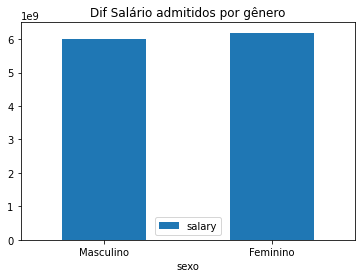

In [ ]:
dados_admitido_salarios.plot.bar(x='sexo', y='salary', rot=0, title='Dif Salário admitidos por gênero')

- Diferença salarial entre homens e mulheres demitidos;

In [ ]:
dados_demitido_salarios_masculino = dados[(dados.saldomovimentação=='demitido') & (dados.sexo=='masculino')]['salário'].sum()
dados_demitido_salarios_feminino = dados[(dados.saldomovimentação=='demitido') & (dados.sexo=='feminino')]['salário'].sum()

In [ ]:
dados_demitido_salarios = pd.DataFrame({'sexo':['Masculino', 'Feminino'], 'salary':[int(dados_demitido_salarios_masculino), int(dados_demitido_salarios_feminino)]})

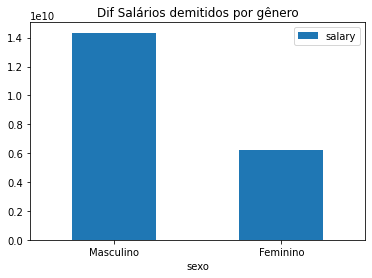

In [ ]:
dados_demitido_salarios.plot.bar(x='sexo', y='salary', rot=0, title='Dif Salários demitidos por gênero')